In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import sys
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE
from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_score as ss
from sklearn.metrics import calinski_harabasz_score as chs
import os
import pickle

In [161]:
# Loading hot dataset

df_hot = pd.read_csv('hot_songs.csv')

df_hot

,song_ids,song_names,song_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,0.943,0.558,2.0,-4.911,1.0,0.0568,0.00260,0.000002,0.0937,0.606,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411.0,4.0
1,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,0.552,0.702,9.0,-5.707,1.0,0.1570,0.11700,0.000021,0.1050,0.564,169.994,audio_features,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427.0,4.0
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,0.750,0.733,6.0,-3.180,0.0,0.0319,0.25600,0.000000,0.1140,0.844,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872.0,1.0
3,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Doja Cat,0.868,0.538,5.0,-8.603,1.0,0.1740,0.26900,0.000003,0.0901,0.732,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750.0,4.0
4,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,0.429,0.453,0.0,-7.746,1.0,0.0459,0.55400,0.000002,0.1020,0.155,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3EvZ03hGAFwGZ2Ebcu86YH,Tourniquet,Zach Bryan,0.593,0.397,6.0,-8.309,1.0,0.0329,0.68400,0.000007,0.0982,0.320,76.703,audio_features,spotify:track:3EvZ03hGAFwGZ2Ebcu86YH,https://api.spotify.com/v1/tracks/3EvZ03hGAFwG...,https://api.spotify.com/v1/audio-analysis/3EvZ...,189053.0,4.0
96,6RcAHyC5sAUIbPTkhOQwd8,Y LLORO,Junior H,0.728,0.589,7.0,-7.115,1.0,0.0376,0.42400,0.000008,0.1660,0.767,77.475,audio_features,spotify:track:6RcAHyC5sAUIbPTkhOQwd8,https://api.spotify.com/v1/tracks/6RcAHyC5sAUI...,https://api.spotify.com/v1/audio-analysis/6RcA...,179013.0,4.0
97,4tKGFmENO69tZR9ahgZu48,Murder On The Dancefloor,Sophie Ellis-Bextor,0.730,0.849,1.0,-5.281,0.0,0.0299,0.00234,0.000026,0.3120,0.887,117.310,audio_features,spotify:track:4tKGFmENO69tZR9ahgZu48,https://api.spotify.com/v1/tracks/4tKGFmENO69t...,https://api.spotify.com/v1/audio-analysis/4tKG...,230013.0,4.0
98,505v13epFXodT9fVAJ6h8k,AMARGURA,KAROL G,0.920,0.696,6.0,-3.356,0.0,0.0742,0.18300,0.000000,0.1490,0.545,106.966,audio_features,spotify:track:505v13epFXodT9fVAJ6h8k,https://api.spotify.com/v1/tracks/505v13epFXod...,https://api.spotify.com/v1/audio-analysis/505v...,170480.0,4.0


In [162]:
# Loading not hot dataset

df_not_hot = pd.read_csv('not_hot_songs.csv')

df_not_hot.head()

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,title,song_ids,artist_name
0,0,0.749,0.802,10,-5.780,0,0.202,0.105000,0.000000,0.2960,...,spotify:track:5q62CK2DoFxdFBzFDCctDE,https://api.spotify.com/v1/tracks/5q62CK2DoFxd...,https://api.spotify.com/v1/audio-analysis/5q62...,174357,4,Underground Rap,Big Tyma,NaN,5q62CK2DoFxdFBzFDCctDE,Alkaline
1,1,0.464,0.602,7,-8.185,1,0.125,0.860000,0.000000,0.1620,...,spotify:track:1npAOCsqbB618Zz4jOQxZL,https://api.spotify.com/v1/tracks/1npAOCsqbB61...,https://api.spotify.com/v1/audio-analysis/1npA...,162373,4,Underground Rap,Mozambique Drill,NaN,1npAOCsqbB618Zz4jOQxZL,Mach-Hommy
2,2,0.577,0.692,11,-5.960,1,0.640,0.372000,0.059600,0.0989,...,spotify:track:5zjdL4aLh3D3wOKeRkZSL6,https://api.spotify.com/v1/tracks/5zjdL4aLh3D3...,https://api.spotify.com/v1/audio-analysis/5zjd...,122483,4,Underground Rap,2000 Rounds,NaN,5zjdL4aLh3D3wOKeRkZSL6,Ghostemane
3,6,0.642,0.694,11,-6.104,1,0.364,0.000335,0.000000,0.3120,...,spotify:track:2TF0kVvksniUGEdwnBSw2v,https://api.spotify.com/v1/tracks/2TF0kVvksniU...,https://api.spotify.com/v1/audio-analysis/2TF0...,143331,4,Underground Rap,85 to Africa,NaN,2TF0kVvksniUGEdwnBSw2v,Jidenna
4,7,0.789,0.488,4,-9.093,0,0.227,0.179000,0.000008,0.1040,...,spotify:track:23NWj2izXAJ4yL6Nah73wf,https://api.spotify.com/v1/tracks/23NWj2izXAJ4...,https://api.spotify.com/v1/audio-analysis/23NW...,209453,4,Underground Rap,Pop Style,NaN,23NWj2izXAJ4yL6Nah73wf,Drake


We need to concatenate both dataframes, therefore:
- We need to ensure they have the same columns with the same names
- We need to add an extra column identifying if the song is hot or not

In [163]:
#  Checking shape of both dataframes (we need to concatenate them while adding a column identifying if they are hot or not)

print(df_hot.shape)
print(df_not_hot.shape)

(100, 20)
(2931, 24)


In [164]:
# It appears df_not_hot has 3 additional columns, let's check which ones and see if they can be removed

print(df_hot.columns)
print(df_not_hot.columns)

Index(['song_ids', 'song_names', 'song_artists', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')
Index(['index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'genre', 'song_name', 'title',
       'song_ids', 'artist_name'],
      dtype='object')


In [165]:
# We might have made an oversight in a previous lab, and the id column in the not hot dataset is duplicated with a different name, let's check if that is the case

df_not_hot['id'].equals(df_not_hot['song_ids'])

True

In [166]:
# Since it is duplicated, let's remove one of them

df_not_hot = df_not_hot.drop(columns='song_ids')

df_not_hot.shape[1]

23

In [167]:
# Title column seems to have a great number of nulls, let's check how many

df_not_hot['title'].isna().sum()

2931

In [168]:
# All the values are nulls, let's remove that column as well

df_not_hot = df_not_hot.drop(columns='title')

df_not_hot.shape[1]

22

In [169]:
# It appears there is also an index column, does it have unique values in each row?

df_not_hot['index'].nunique()

2931

In [170]:
# It indeed does, let's also remove that one

df_not_hot = df_not_hot.drop(columns='index')

df_not_hot.shape[1]

21

In [171]:
# Let's standardize column names so we can check which columns both dataframes don't have in common

column_mapping = {'song_ids': 'id', 'song_names': 'song_name', 'song_artists': 'artist_name'}

df_hot = df_hot.rename(columns=column_mapping)

df_hot.columns

Index(['id', 'song_name', 'artist_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [172]:
columns_not_in_common = df_hot.columns.difference(df_not_hot.columns).union(df_not_hot.columns.difference(df_hot.columns))
columns_not_in_common

Index(['genre'], dtype='object')

In [173]:
# In order to concat the dataframes, we will need to remove the genre column. Let's save the current dataframe as a copy just in case we need it in the future

df_not_hot_genre = df_not_hot.copy()

df_not_hot = df_not_hot.drop(columns='genre')

print(df_hot.shape)
print(df_not_hot.shape)
print(df_hot.columns.difference(df_not_hot.columns).union(df_not_hot.columns.difference(df_hot.columns)))

(100, 20)
(2931, 20)
Index([], dtype='object')


In [174]:
# Creating is_hot boolean columns to determine if the song appears in the billboard100 or not

df_hot['is_hot'] = 1

df_not_hot['is_hot'] = 0

display(df_hot.head(1))
display(df_not_hot.head(1))

,id,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,is_hot
0,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,0.943,0.558,2.0,-4.911,1.0,0.0568,0.0026,...,0.0937,0.606,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411.0,4.0,1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,is_hot
0,0.749,0.802,10,-5.78,0,0.202,0.105,0.0,0.296,0.47,...,audio_features,5q62CK2DoFxdFBzFDCctDE,spotify:track:5q62CK2DoFxdFBzFDCctDE,https://api.spotify.com/v1/tracks/5q62CK2DoFxd...,https://api.spotify.com/v1/audio-analysis/5q62...,174357,4,Big Tyma,Alkaline,0


In [175]:
# Concatenating both dfs into 1

df_all = pd.concat([df_hot, df_not_hot], axis=0)

print(df_all.shape)
df_all.head()

(3031, 21)


,id,song_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,is_hot
0,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,0.943,0.558,2.0,-4.911,1.0,0.0568,0.0026,...,0.0937,0.606,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411.0,4.0,1
1,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,...,0.1050,0.564,169.994,audio_features,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427.0,4.0,1
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,0.750,0.733,6.0,-3.180,0.0,0.0319,0.2560,...,0.1140,0.844,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872.0,1.0,1
3,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Doja Cat,0.868,0.538,5.0,-8.603,1.0,0.1740,0.2690,...,0.0901,0.732,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750.0,4.0,1
4,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,0.429,0.453,0.0,-7.746,1.0,0.0459,0.5540,...,0.1020,0.155,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196.0,4.0,1


In [176]:
# Removing useless columns

print(df_all['type'].value_counts())

# This column has the same value in every row, let's remove

df_all = df_all.drop(columns='type')

df_all.shape

type
audio_features    3031
Name: count, dtype: int64


(3031, 20)

In [177]:
# Creating a new dataframe that contains only the features that will be used for clustering

cols_to_drop = ['id', 'song_name', 'artist_name', 'uri', 'track_href', 'analysis_url']

df_cluster = df_all.drop(columns=cols_to_drop)

df_cluster.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'is_hot'],
      dtype='object')

In [178]:
# Scaling values of all columns

scaler = StandardScaler()

scaled = scaler.fit_transform(df_cluster)

path = "scalers/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "standardscaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

df_scaled = pd.DataFrame(scaled, columns=df_cluster.columns)

df_scaled.head()

The new directory is created!


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,is_hot
0,1.783216,-0.646429,-0.853702,0.622329,0.820769,-0.760343,-0.775728,-0.285088,-0.679044,0.698956,-1.465810,-1.067038,0.109515,5.413871
1,-0.704719,0.171647,1.051325,0.331475,0.820769,-0.026844,-0.237814,-0.284987,-0.605471,0.515471,0.685143,-0.379150,0.109515,5.413871
2,0.555156,0.347760,0.234885,1.254827,-1.218370,-0.942619,0.415770,-0.285100,-0.546873,1.738700,-1.266136,-1.179445,-8.861798,5.413871
3,1.305991,-0.760051,-0.037262,-0.726708,0.820769,0.097602,0.476896,-0.285082,-0.702483,1.249408,-1.631736,0.537488,0.109515,5.413871
4,-1.487369,-1.242943,-1.397995,-0.413565,0.820769,-0.840135,1.816978,-0.285089,-0.625004,-1.271316,-2.370513,0.459204,0.109515,5.413871


## PCA

In [179]:
# Dimensionality reduction with PCA

pca = PCA(random_state=69)

principal_components = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,principal_components.shape[1]+1)])

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,0.306448,-0.856201,0.283326,5.207786,-0.986589,1.522015,0.065576,-1.282551,2.251104,0.920888,0.536778,-0.749495,-0.338359,-0.600129
1,-0.259869,0.233470,1.014423,3.015732,1.010572,1.779493,0.662589,-2.636513,1.994022,2.034429,1.691135,-0.369395,0.376522,-0.209482
2,0.184913,0.682889,1.478473,4.852254,3.929579,7.267141,-1.694956,3.676472,2.689904,0.295150,0.212889,0.586416,-0.146516,-0.487250
3,1.404569,-1.267012,1.208454,4.624246,-0.005100,0.784850,1.288767,-0.698660,2.167797,1.731316,1.110752,-0.077685,0.089332,0.028793
4,2.632686,1.950642,0.440175,5.048044,0.683125,0.496080,2.186762,-1.645989,1.209501,-0.059309,1.142728,0.585113,-0.111068,-0.245784


In [180]:
pca.explained_variance_ratio_

array([0.1626247 , 0.11579509, 0.09184809, 0.08682625, 0.07764166,
       0.07425642, 0.07056138, 0.06135624, 0.05666983, 0.05549139,
       0.05178366, 0.04590121, 0.0336154 , 0.01562868])

In [181]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.1626247014167417,
 0.27841978806544865,
 0.3702678760557855,
 0.4570941307321964,
 0.5347357906697295,
 0.6089922152627855,
 0.6795535913109395,
 0.7409098278670125,
 0.7975796588780544,
 0.8530710517794496,
 0.9048547128679874,
 0.9507559199834273,
 0.984371323227968,
 1.0000000000000002]

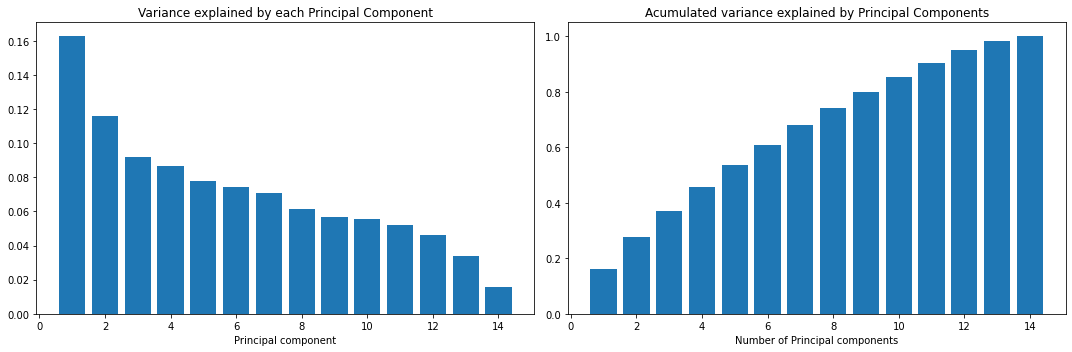

In [182]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].bar(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].bar(np.arange(1, len(pca.explained_variance_ratio_) + 1),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

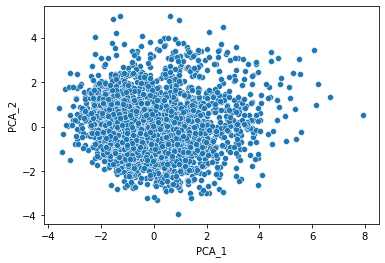

In [183]:
sns.scatterplot(data=df_pca, x='PCA_1', y='PCA_2')
plt.show()

In [184]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_pca['PCA_1'],
    y=df_pca['PCA_2'],
    z=df_pca['PCA_3'],
    mode='markers'
)])

fig.update_layout(scene=dict(xaxis_title='PCA_1', yaxis_title='PCA_2', zaxis_title='PCA_3'),
                  title='PCA 3D Scatter Plot')

fig.show()

## TruncatedSVD

In [185]:
# Dimensionality reduction with SVD

svd = TruncatedSVD(n_components=3, random_state=69)

svd_principal_components = svd.fit_transform(df_scaled)

df_svd = pd.DataFrame(svd_principal_components, columns=['SVD_'+ str(i) for i in range(1,svd_principal_components.shape[1]+1)])

df_svd.head()

,SVD_1,SVD_2,SVD_3
0,0.306447,-0.856195,0.283337
1,-0.259870,0.233472,1.014427
2,0.184913,0.682894,1.478481
3,1.404569,-1.267013,1.208453
4,2.632685,1.950644,0.440179


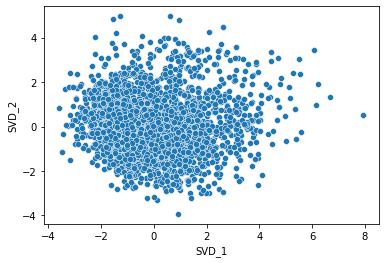

In [186]:
# 2d scatterplot with first 2 components

sns.scatterplot(data=df_svd, x='SVD_1', y='SVD_2')
plt.show()

In [187]:
# 3d scatterplot for first 3 components

fig = go.Figure(data=[go.Scatter3d(
    x=df_svd['SVD_1'],
    y=df_svd['SVD_2'],
    z=df_svd['SVD_3'],
    mode='markers'
)])

fig.update_layout(scene=dict(xaxis_title='SVD_1', yaxis_title='SVD_2', zaxis_title='SVD_3'),
                  title='SVD 3D Scatter Plot')


## ISOMAP

In [188]:
# Dimensionality reduction with Isomap

iso = Isomap(n_neighbors=12, n_components=3)
iso.fit(df_scaled)
isomap_transformed = iso.transform(df_scaled)
df_isomap = pd.DataFrame(isomap_transformed, columns=['ISO_1','ISO_2', 'ISO_3'])
df_isomap.head()

,ISO_1,ISO_2,ISO_3
0,42.267184,0.521688,-0.404343
1,40.419363,0.530931,-0.334094
2,29.588491,0.577013,0.092385
3,40.278492,0.529797,-0.327224
4,43.144642,0.517709,-0.440272


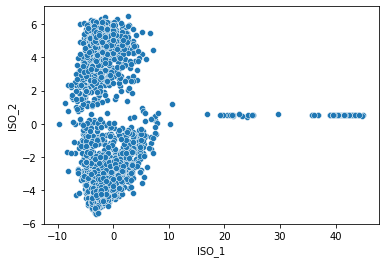

In [189]:
# 2d scatterplot with first 2 components

sns.scatterplot(data=df_isomap, x='ISO_1', y='ISO_2')
plt.show()

In [190]:
# 3d scatterplot for first 3 components

fig = go.Figure(data=[go.Scatter3d(
    x=df_isomap['ISO_1'],
    y=df_isomap['ISO_2'],
    z=df_isomap['ISO_3'],
    mode='markers'
)])

fig.update_layout(scene=dict(xaxis_title='ISO_1', yaxis_title='ISO_2', zaxis_title='ISO_3'),
                  title='Isomap 3D Scatter Plot')

fig.show()

## TSNE

In [191]:
# Dimensionality reduction with TSNE

tsne = TSNE(n_components=3, random_state=69)
tsne_transformed = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(tsne_transformed, columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])
df_tsne.head()

,TSNE_1,TSNE_2,TSNE_3
0,18.691242,8.195350,10.052481
1,16.043644,7.053655,7.934020
2,21.539812,5.229021,4.438700
3,18.897551,10.407530,8.124355
4,16.022701,11.308323,6.166650


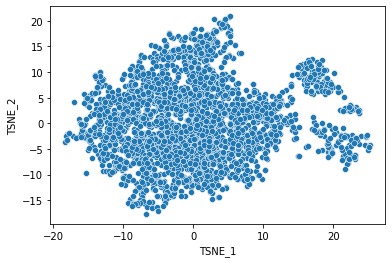

In [192]:
# 2d scatterplot with first 2 components

sns.scatterplot(data=df_tsne, x='TSNE_1', y='TSNE_2')
plt.show()

In [193]:
# 3d scatterplot for first 3 components

fig = go.Figure(data=[go.Scatter3d(
    x=df_tsne['TSNE_1'],
    y=df_tsne['TSNE_2'],
    z=df_tsne['TSNE_3'],
    mode='markers'
)])

fig.update_layout(scene=dict(xaxis_title='TSNE_1', yaxis_title='TSNE_2', zaxis_title='TSNE_3'),
                  title='Isomap 3D Scatter Plot')

fig.show()

## UMAP

In [194]:
umap = UMAP(n_components=3, random_state=69)
umap.fit(df_scaled)

umap_transformed = umap.transform(df_scaled)
df_umap = pd.DataFrame(umap_transformed, columns=['UMAP_1','UMAP_2', 'UMAP_3'])
df_umap.head()

c:\Users\Juan\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



,UMAP_1,UMAP_2,UMAP_3
0,13.427081,10.757136,3.930030
1,13.524175,10.840373,3.882672
2,13.659345,11.013347,4.205117
3,13.506070,10.787850,3.680230
4,13.733364,11.024254,3.586994


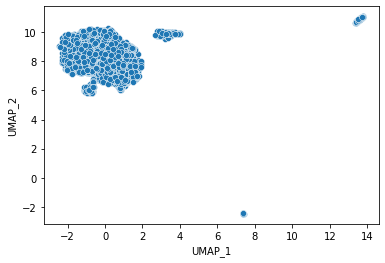

In [195]:
sns.scatterplot(data=df_umap, x='UMAP_1', y='UMAP_2')
plt.show()

In [196]:
# 3d scatterplot for first 3 components

fig = go.Figure(data=[go.Scatter3d(
    x=df_umap['UMAP_1'],
    y=df_umap['UMAP_2'],
    z=df_umap['UMAP_3'],
    mode='markers'
)])

fig.update_layout(scene=dict(xaxis_title='UMAP_1', yaxis_title='UMAP_2', zaxis_title='UMAP_3'),
                  title='Isomap 3D Scatter Plot')

fig.show()

## Clustering with HDBSCAN

In [197]:
# Saving UMAP model

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "umap.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(umap, file)

The new directory is created!


In [198]:
# Using UMAP as our dimensionality reduction technique

# If our df already has a labels column, drop it
if 'labels' in df_umap.columns:
    df_umap = df_umap.drop(columns='labels')

# HDBSCAN clustering
hdbscan = HDBSCAN(min_cluster_size=(df_umap.shape[1] * 2), cluster_selection_epsilon=1)
cluster_labels = hdbscan.fit_predict(df_umap[['UMAP_1', 'UMAP_2', 'UMAP_3']])

# Add the new 'labels' column
df_umap['labels'] = cluster_labels

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_umap['UMAP_1'],
    y=df_umap['UMAP_2'],
    z=df_umap['UMAP_3'],
    mode='markers',
    marker=dict(
        color=df_umap['labels'],
        colorscale='Viridis',
        colorbar=dict(title='labels')
    )
)])

fig.update_layout(scene=dict(xaxis_title='UMAP_1', yaxis_title='UMAP_2', zaxis_title='UMAP_3'),
                  title='UMAP + HDBSCAN 3D Scatter Plot')

fig.show()

In [199]:
# Saving HDBSCAN model

path = "models/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    print("The new directory is created!")

filename = "hdbscan.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(hdbscan, file)